In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
chicago_df_1=pd.read_csv('/kaggle/input/chicago-crime-rate/Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip')
chicago_df_2=pd.read_csv('/kaggle/input/chicago-crime-rate/Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip')
chicago_df_3=pd.read_csv('/kaggle/input/chicago-crime-rate/Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip')

In [3]:
chicago_df_1
chicago_df_2
chicago_df_3
chicago_df =pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

<Axes: >

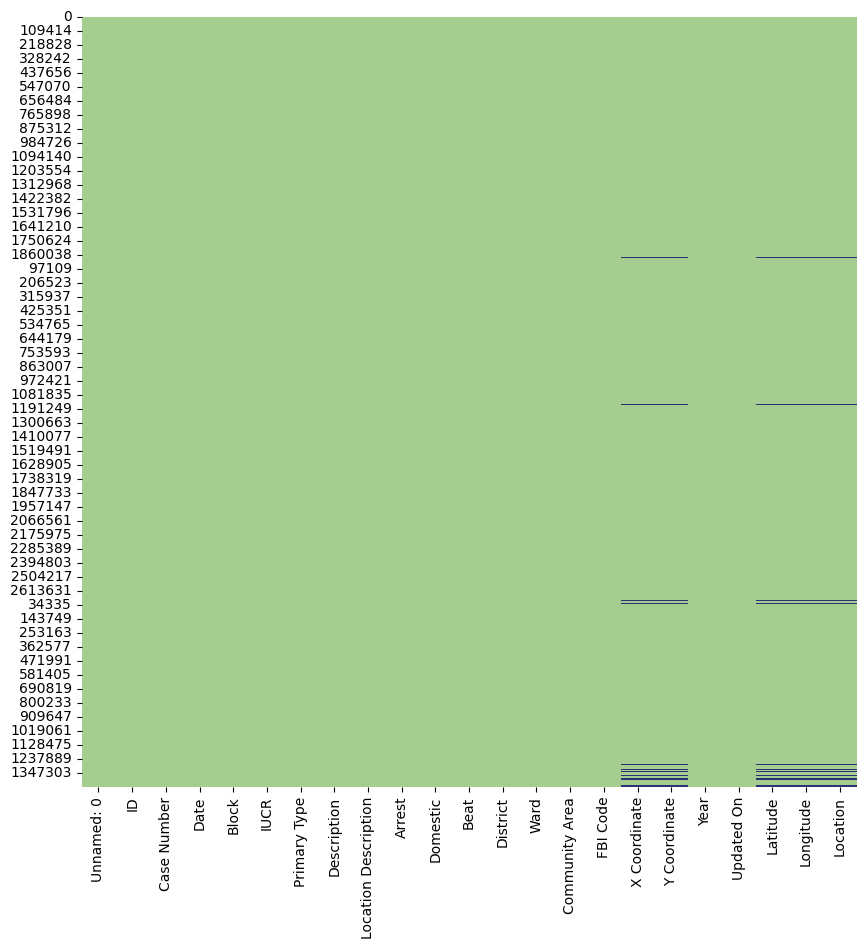

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(),cbar=False, cmap="crest")

In [5]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace=True, axis=1)

In [6]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [7]:
chicago_df.index=pd.DatetimeIndex(chicago_df.Date)

In [8]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object', name='Primary Type')

<Axes: xlabel='count', ylabel='Primary Type'>

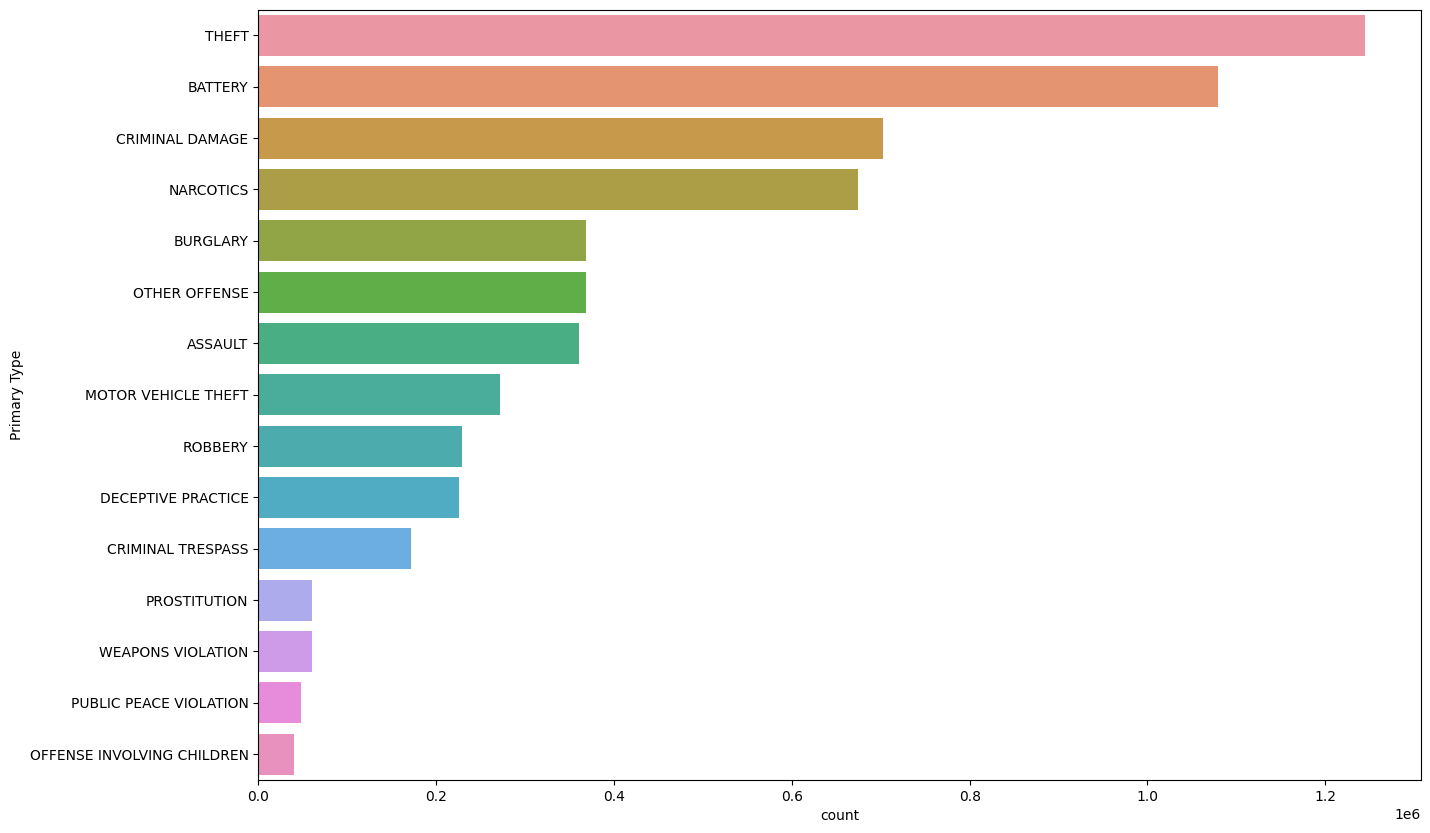

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=chicago_df, order=chicago_df['Primary Type'].value_counts().iloc[:15].index)

<Axes: xlabel='count', ylabel='Location Description'>

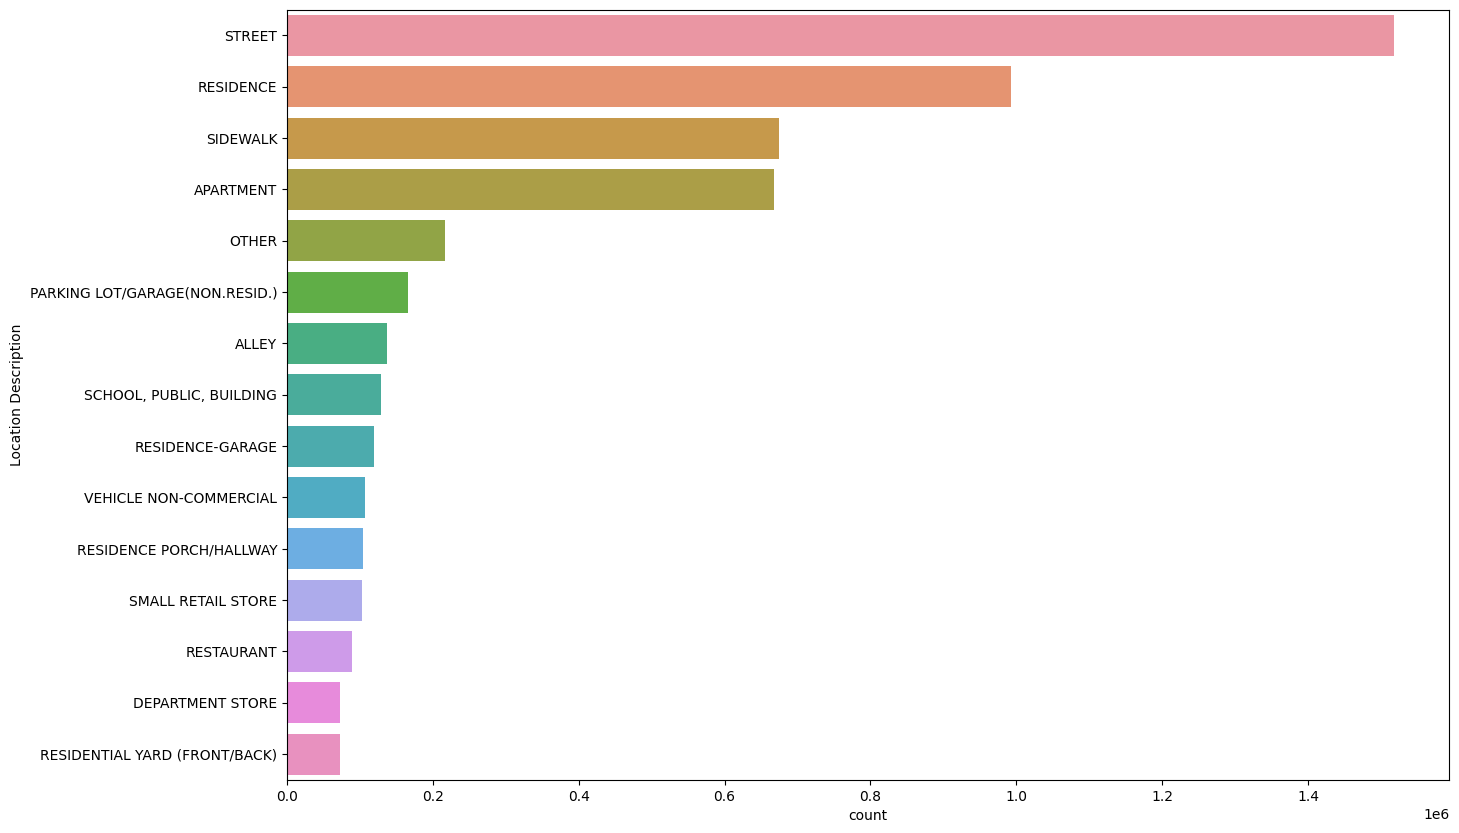

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description', data=chicago_df, order=chicago_df['Location Description'].value_counts().iloc[:15].index)

Text(0, 0.5, 'Number of Crimes')

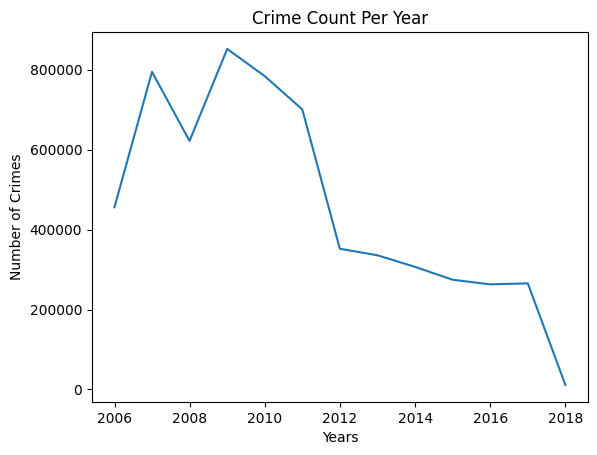

In [11]:
plt.plot(chicago_df.resample('YE').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

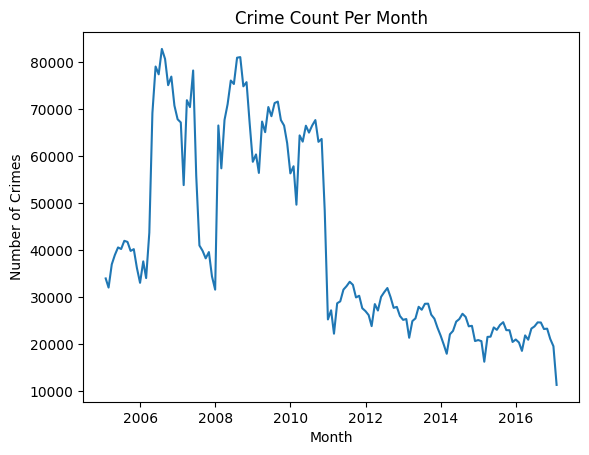

In [12]:
plt.plot(chicago_df.resample('ME').size())
plt.title('Crime Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

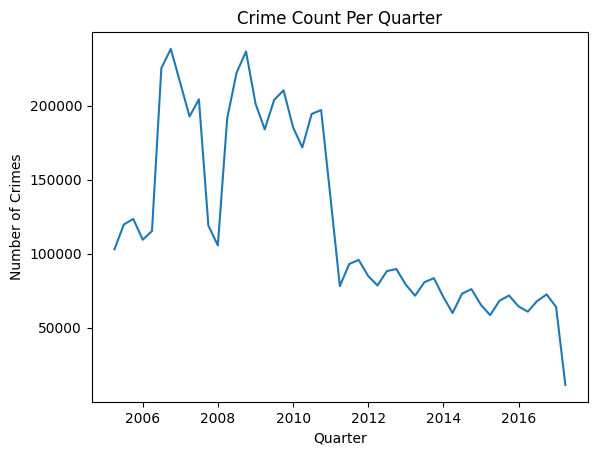

In [13]:
plt.plot(chicago_df.resample('QE').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

In [14]:
chicago_prophet = chicago_df.resample('ME').size().reset_index()

In [15]:
chicago_prophet.columns = ['Date','Crime Count']

In [16]:
chicago_prophet_df=pd.DataFrame(chicago_prophet)

In [17]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns = {'Date':'ds','Crime Count':'y'})

In [18]:
m=Prophet()
m.fit(chicago_prophet_df_final)

10:14:50 - cmdstanpy - INFO - Chain [1] start processing
10:14:50 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


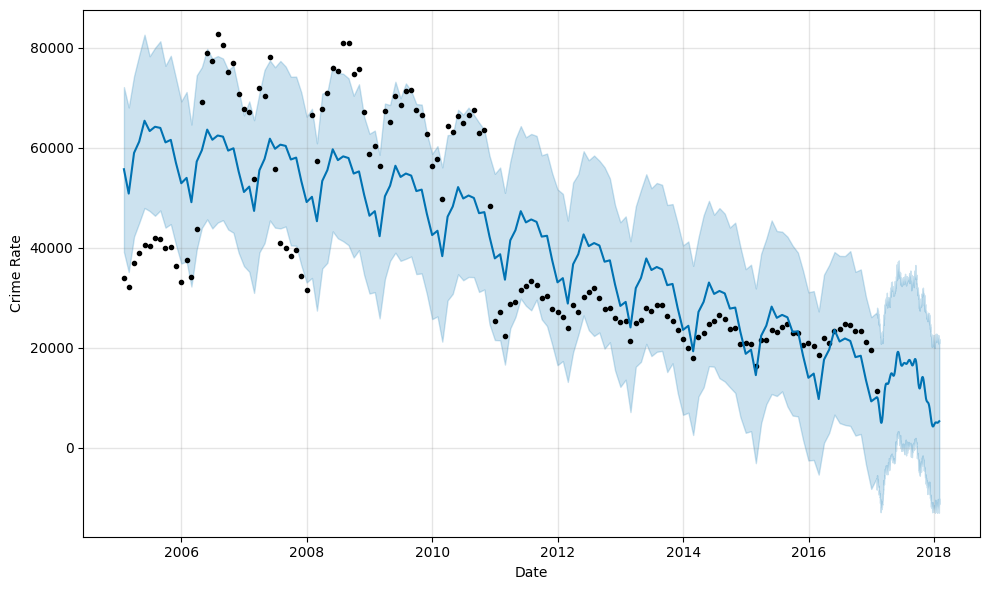

In [20]:
figure=m.plot(forecast,xlabel='Date', ylabel='Crime Rate')

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

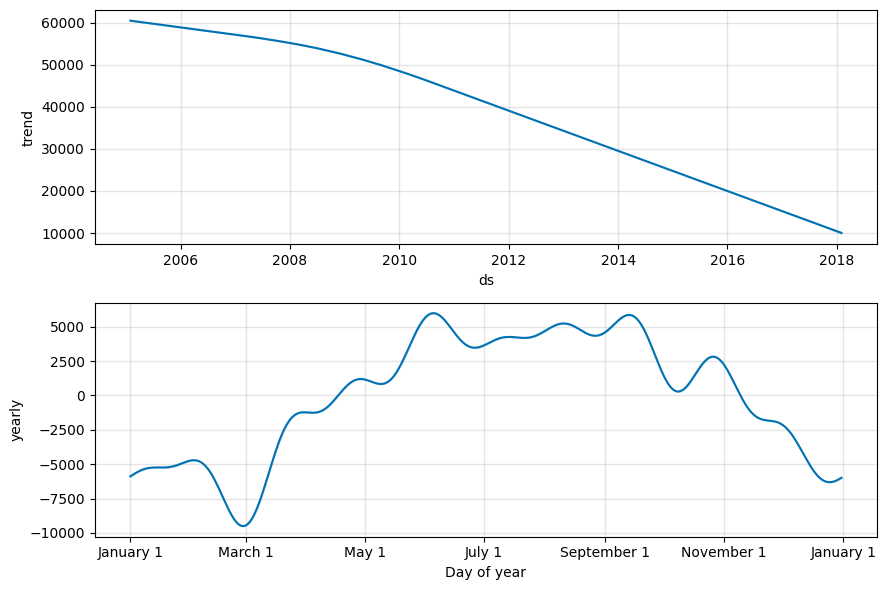

In [21]:
figure=m.plot_components(forecast)